CNN 실습 & 과제 코드입니다.

답지는 다음주 목요일 오전 8시에 업로드됩니다.

모두 화이팅 :)

**(기본 code를 바탕으로 빈칸을 채워주세요)**

## Library Import

In [143]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K 

from tensorflow.keras.datasets import cifar10

In [144]:
# class 개수 지정
NUM_CLASSES = 10

In [145]:
# CIFAR-10 dataset load
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

- **Assignment 1: X_train, X_test, y_train, y_test의 shape과 형식을 출력해보세요. (각각 출력해도 됩니다!)**

In [146]:
## 여기에!

In [147]:
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (50000, 32, 32, 3)
X_test :  (10000, 32, 32, 3)
y_train :  (50000, 1)
y_test :  (10000, 1)


In [148]:
# 기본적으로 image data는 pixel channel마다 0~255 integer로 구성되는데,
# 신경망은 input이 -1~1 범위에서 가장 잘 동작하기 때문에 데이터를 255로 나눈다.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [149]:
# image의 integer label을 one-hot encoding vector로 바꾼다.
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

- **Assignment 2: 변환된 y_train, y_test의 shape을 출력해보세요.**

In [150]:
## 여기에!

In [151]:
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

y_train :  (50000, 10)
y_test :  (10000, 10)


- **Assignment 3: X_train에서, index 54의 이미지에서 (12,13) 위치에 해당하는 픽셀의 초록 채널(1) 값을 출력해보세요. (힌트: X_train[?,?,?,?])**

In [152]:
## 여기에!

In [153]:
## – input : (sample 개수, height, width, channel) 

In [154]:
print("X_train (12, 13)의 초록채널(1) : ", X_train[54,12,13,1])

X_train (12, 13)의 초록채널(1) :  0.36862746


## Modeling

Keras에서 신경망 구조를 정의하는 방법은 **Sequential 모델**과 **함수형 API** 두 가지가 있습니다.  

Sequential 모델은 일렬로 층을 쌓은 네트워크를 빠르게 만들 때 사용하기 좋습니다. 즉 어떤 분기가 없이 이전 층이 그대로 다음 층으로 연결됩니다.  
하지만 한 층의 출력이 여러 개의 별도의 층으로 전달되거나, 한 층이 여러 층으로부터 입력을 받는 등의 가지가 있는 네트워크를 만들기 위해서는 유연성이 많은 함수형 API를 사용하는 것이 좋습니다.  
Keras에서도 단순한 모델을 만들더라도 Sequential 모델보다 함수형 API를 권장합니다. 장기적으로 보면 모델이 점점 복잡한 구조가 될 수 있기 때문입니다.  
함수형 API는 Deep Neural Network 구조를 설계하는 데에 있어 엄청난 자유를 제공합니다.

따라서 본 assignment에서는 함수형 API를 사용하여 Modeling을 진행하였습니다.

In [12]:
input_layer = Input(shape=(32,32,3))


x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)


model = Model(input_layer, output_layer)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

## Train

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])

- **Assignment 4: loss를 categorical_crossentropy로 설정한 이유는 무엇일까요?**
- 답: 클래스가 여러 개인 다중 분류 문제라서

In [18]:
BATCH_SIZE = 32
EPOCHS = 10

In [19]:
model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          shuffle=True,
          validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 42s 26ms/step - loss: 1.4614 - accuracy: 0.4790 - val_loss: 1.1920 - val_accuracy: 0.5824
Epoch 2/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.1073 - accuracy: 0.6146 - val_loss: 1.0225 - val_accuracy: 0.6429
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9693 - accuracy: 0.6606 - val_loss: 1.0347 - val_accuracy: 0.6430
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8743 - accuracy: 0.6966 - val_loss: 1.0023 - val_accuracy: 0.6575
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8076 - accuracy: 0.7172 - val_loss: 0.9039 - val_accuracy: 0.6915
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7566 - accuracy: 0.7349 - val_loss: 0.9259 - val_accuracy: 0.6807
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7076 - accuracy: 0.7519 - val_loss: 0.8998 -

In [21]:
model.layers[6].get_weights()

[array([[[[-2.04132218e-03, -8.35416913e-02,  4.59065586e-02, ...,
            2.99544819e-02,  6.49684742e-02, -7.57667944e-02],
          [ 7.52296001e-02, -8.53262171e-02, -5.60760163e-02, ...,
           -1.31233856e-02, -9.37754884e-02, -4.54442203e-02],
          [-5.10134287e-02, -5.18093407e-02, -5.12105338e-02, ...,
           -3.99244055e-02,  4.05217484e-02, -3.81442308e-02],
          ...,
          [ 8.02195892e-02,  1.82135161e-02,  9.40141678e-02, ...,
           -2.43046135e-02, -1.14651889e-01, -1.36378169e-01],
          [ 1.80651203e-01, -7.63533264e-03,  8.48709047e-02, ...,
            3.17216776e-02, -4.79654446e-02,  4.52174805e-02],
          [-6.53716251e-02,  1.12134367e-01,  1.25620559e-01, ...,
            9.35182814e-03, -6.32824749e-02, -5.52557297e-02]],
 
         [[-1.25385299e-01, -1.29724741e-01, -7.89134279e-02, ...,
           -9.37826410e-02, -1.44733697e-01,  5.10271713e-02],
          [-2.59969775e-02, -3.55028175e-02,  8.25236216e-02, ...,
     

## Evaluate

In [22]:
model.evaluate(X_test, y_test, batch_size=1000)

10/10 [==============================] - 2s 139ms/step - loss: 0.9295 - accuracy: 0.6993


[0.9294757843017578, 0.6992999911308289]

[loss, accuracy] 가 출력된다.  
결과를 시각화해 보자.

In [23]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

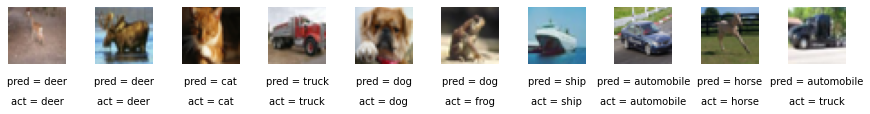

In [24]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

**- Assignment 5: model및 training 환경을 자유롭게 변경하여 Accuracy 75% 이상을 달성해 보세요!**

In [ ]:
## 위의 모델을 참고해 만들어보세요
## 새로운 방법도 좋아요!
## 화이팅 :D

In [163]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [164]:
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train :  (50000, 32, 32, 3)
X_test :  (10000, 32, 32, 3)
y_train :  (50000, 10)
y_test :  (10000, 10)


In [156]:
def deep_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [157]:
model = deep_cnn()
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 50)        1400      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 50)        22550     
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 50)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 50)        22550     
_________________________________________________________________
activation_21 (Activation)   (None, 16, 16, 50)      

In [158]:
# 모델 학습
history = model.fit(X_train, y_train, 
                 batch_size=40 ,epochs=15, 
                 validation_data=(X_test ,y_test))

Epoch 1/15
1250/1250 [==============================] - 134s 106ms/step - loss: 1.5467 - accuracy: 0.4324 - val_loss: 1.1790 - val_accuracy: 0.5655
Epoch 2/15
1250/1250 [==============================] - 133s 106ms/step - loss: 1.0532 - accuracy: 0.6245 - val_loss: 0.9602 - val_accuracy: 0.6544
Epoch 3/15
1250/1250 [==============================] - 141s 113ms/step - loss: 0.8631 - accuracy: 0.6951 - val_loss: 0.8306 - val_accuracy: 0.7108
Epoch 4/15
1250/1250 [==============================] - 133s 106ms/step - loss: 0.7538 - accuracy: 0.7356 - val_loss: 0.7921 - val_accuracy: 0.7237
Epoch 5/15
1250/1250 [==============================] - 122s 97ms/step - loss: 0.6754 - accuracy: 0.7640 - val_loss: 0.8064 - val_accuracy: 0.7200
Epoch 6/15
1250/1250 [==============================] - 121s 97ms/step - loss: 0.6138 - accuracy: 0.7842 - val_loss: 0.7472 - val_accuracy: 0.7438
Epoch 7/15
1250/1250 [==============================] - 117s 93ms/step - loss: 0.5547 - accuracy: 0.8056 - val_los

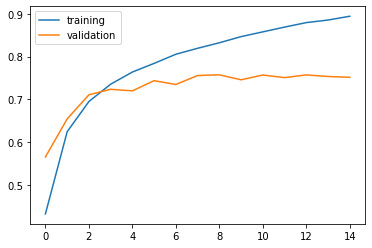

In [161]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [162]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 8s 20ms/step - loss: 0.8906 - accuracy: 0.7517
Test accuracy:  0.7516999840736389


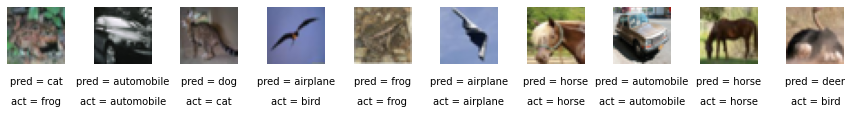

In [165]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)